## Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

**0.Importamos librerías**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
from pandas.plotting import scatter_matrix


**1. Abre el archivo de datos y estudia la información general** 

In [2]:
df=pd.read_csv('data_frame/games.csv')
print(df.head(10))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


**2. Prepara los datos**

**2.1.** Reemplazamos los nombres de las columnas

In [4]:
#Reemplazamos los nombres de las columnas en minusculas
df.columns=df.columns.str.lower()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


**2.2.** Convertimos los datos a los tipos necesarios.

In [5]:
#Vamos a cambiar la columna 'user_score' a numérico para hacer operaciones con estos valores, usamos el parámetro error=coerce para que no tenga en cuenta el objeto 'tbd'.
df.info()
df['user_score']=pd.to_numeric(df['user_score'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  ob

Pasamos la columna 'user_score' a float, debido a que se trata de calificaciones numericas, por lo tanto debemos hacer operaciones con estos.  
Pasamos todos los tipos de datos incorrectos al correcto, ahora vamos a trabajar con los ausentes.

**2.3.** Tratamiento de ausentes y duplicados.

In [6]:
#Reemplazamos los tbd por NAN
df['user_score']=df['user_score'].replace('tbd',np.nan)
print(df['user_score'].unique())

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


Consideramos los valores 'tbd' como valores ausentes, debido a que no son valores útiles para hacer calculos y sesgan más nuestros datos, por lo tanto los reemplazamos por valores nan.

In [7]:
#Calculamos el porcentaje de ausentes sobre el total
print(100*df.isna().sum()/df.shape[0])
df.dropna(axis=0,inplace=True,subset=['name','genre'])
print(100*df.isna().sum()/df.shape[0])

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64
name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating             40.471489
dtype: float64


 Borramos los ausentes de la columna name y genre, ya que no son significantes en el dataframe. Con respecto a los ausentes de las columnas **'critic_score', 'user_score' y 'rating'**, al ser el porcentaje tan alto, mayor al **30% de los datos** no es viable eliminarnos ni rellenarlos con algun estadístico, debido a que esto modificaría una gran parte de los datos afectando el análisis.

In [8]:
#Llenamos los valores de la columna year_of_release por la mediana.
df['year_of_release'].fillna(df['year_of_release'].median(),inplace=True)
print(100*df.isna().sum()/df.shape[0])

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating             40.471489
dtype: float64


Para el caso de el año de realización lo llenamos con la **mediana**.

**Verificamos si existen duplicados en nuestros datos.**

In [9]:
print(df.duplicated().sum())

0


**2.4.** Calculamos las ventas totales.

In [10]:
#Calculamos el total de ventas de todas las regiones.
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']
print(df.iloc[:,4:])

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  total_sales  
0          E        74.09  
1      

**3. Analiza los datos**

- **3.1. Juegos lanzados por año**

In [11]:
#Hacemos un diagrama de líneas para ver el comportamiento
games_year=df.groupby('year_of_release',as_index=False)['name'].count()
fig=px.line(games_year,
            x='year_of_release',
            y='name',
            title='Juegos lanzados por año')
fig.show()

In [12]:
#Generamos un dataframe acotandolo para desestimar los datos obsoletos.
representative_df=df[df['year_of_release']>=1995]

Podemos ver que el gráfico tiene 2 puntos de inflexión importantes, a partír del año **1995** y el dato **máximo de ventas en 2007**, a partír de ahí las venras comienzan a bajar. Podemos decir que nuestros datos representantivos son **a partír del año 1995**, debido a que los números comienzan a aumentar.

- **3.2. Ventas por plataforma**

In [13]:
#Usamos una tabla dinamica para saber cuales son las ventas totales por plataforma
sales_platform=representative_df.pivot_table(index='platform',values='total_sales',aggfunc='sum')
sales_platform.sort_values(by='total_sales',ascending=False,inplace=True)
top_5_platforms=sales_platform.head(5)
top_5_platforms

,total_sales
platform,
PS2,1062.33
X360,885.66
Wii,828.44
PS3,803.97
DS,746.84


In [14]:
#Acotamos un dataframe con las plataformas más populares.
top_5_platforms_list=top_5_platforms.index
platform_distrib=representative_df[representative_df['platform'].isin(top_5_platforms_list)]
platform_distrib=platform_distrib.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
platform_distrib.head()

,year_of_release,platform,total_sales
0,2000.0,PS2,35.59
1,2001.0,PS2,149.65
2,2002.0,PS2,183.66
3,2003.0,PS2,163.62
4,2004.0,DS,15.91


In [15]:
#Graficamos las ventas por cada plataforma en un diagrama de lineas
fig1=px.line(platform_distrib,x='year_of_release',y='total_sales',color='platform', title='Vida de cada consola')
fig1.show()

**3.3. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**

In [16]:
#Creamos una lista de las consolas antiguas para ver en que momento desaparecen.
old_consoles=['PS2','DS','PS','GBA','PSP']
#Verificamos cual es el tiempo de vida de una plataforma
life_platform=representative_df.groupby('platform')['year_of_release'].agg(['min','max']).reset_index()
life_platform['life']=life_platform['max']-life_platform['min']
life_platform=life_platform[life_platform['platform'].isin(old_consoles)]
prom_life=life_platform['life'].mean()
print(f'El promedio de vida de la consola es de {prom_life}.')

El promedio de vida de la consola es de 10.0.


Analizando el promedio de vida de cada una de las consolas, estas crecen aproximadamente **5 años** hasta llegar a su punto máximo y vuelven y caen durante los siguientes **5 años**, por lo cual en general las antiguas y nuevas consolas tienen un tiempo de aparición y desaparición de **5 años**.

**3.4. Selección de los datos:**  
Vamos a usar los datos de **2012 en adelante** debido a que son los años relevantes en los cuales las plataformas permanecen actualmente. Además, se seleccionaron las 5 plataformas con más ventas.

In [17]:
#Determinamos que se deben tomar datos posteriores a 2012, por lo que acotamos el dataframe.
bounded_data=platform_distrib[platform_distrib['year_of_release']>=2012.0]
bounded_data.reset_index(drop=True).head()

,year_of_release,platform,total_sales
0,2012.0,DS,10.42
1,2012.0,PS3,90.87
2,2012.0,Wii,20.22
3,2012.0,X360,91.45
4,2013.0,DS,1.42


**3.5. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?**

In [18]:
#Graficamos los ultimos años para ver cuales plataformas crecen
fig2=px.line(bounded_data,x='year_of_release',y='total_sales',color='platform', title='Ventas de las consolas lideres')
fig2.show()

In [19]:
fig3=px.line(bounded_data[bounded_data['year_of_release']>=2014],x='year_of_release',y='total_sales',color='platform', title='Ventas de las consolas lideres')
fig3.show()

Podemos ver que las consolas con más ventas las cuales son **PS3, X360 y Wii** están decreciendo sus ventas, lo que indica que están en el último periodo de vida, por lo cual debemos hacer un análsis incluyendo también las consolas nuevas.

In [20]:
#Creamos un dataframe con las consolas más nuevas
new_era=df[(df['year_of_release']>=2015)]
new_consoles=new_era.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
new_consoles.sort_values(by='total_sales',ascending=False,inplace=True)
new_consoles=new_consoles.head(10)
new_consoles

,year_of_release,platform,total_sales
3,2015.0,PS4,100.44
13,2016.0,PS4,59.01
9,2015.0,XOne,54.67
0,2015.0,3DS,26.75
18,2016.0,XOne,23.91
7,2015.0,WiiU,15.22
2,2015.0,PS3,14.70
10,2016.0,3DS,14.50
8,2015.0,X360,10.86
1,2015.0,PC,7.93


In [21]:
new_consoles_list=new_consoles['platform'].unique()
new_data=df[df['platform'].isin(new_consoles_list)].groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()    


In [22]:
#Se grafican las consolas nuevas y populares
fig4=px.line(new_data[new_data['year_of_release']>=2013],x='year_of_release',y='total_sales',color='platform', title='Ventas de las consolas nuevas')
fig4.show()

Podemos ver que las plataformas más nuevas tuvieron un crecimiento para 2015, por lo cual, le agregaremos a nuestro análisis las consolas nuevas más exitosas como **la PS4, XOne y 3DS.**

**3.5. Vamos a análizar con diagramas de caja las ventas globales por plataforma teniendo en cuenta las plataformas más exitosas.**

In [23]:
new_consoles_list

array(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360', 'PC'], dtype=object)

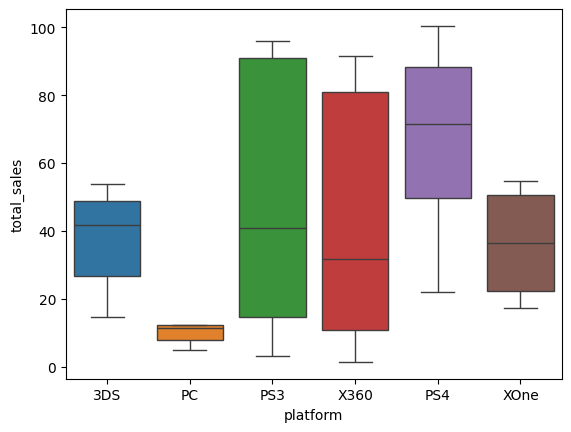

In [24]:
#Creamos el boxplot con las plataformas actuales y populares
updated_list=['PS4', 'XOne', '3DS','PS3', 'X360', 'PC']
updated_df=df[(df['year_of_release']>=2012)&(df['platform'].isin(updated_list))]
updated_df_group=updated_df.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
fig=sns.boxplot(data=updated_df_group,x='platform',y='total_sales',hue='platform',showfliers=False)

In [25]:
#Calculamos el promedio de ventas anual de cada plataforma
for platform in updated_list:
    prom=updated_df_group[updated_df_group['platform']==platform]['total_sales'].mean().round(2)
    print(f'El promedio de ventas de la plataforma {platform} es {prom} millones de dolares.')

El promedio de ventas de la plataforma PS4 es 66.45 millones de dolares.
El promedio de ventas de la plataforma XOne es 36.26 millones de dolares.
El promedio de ventas de la plataforma 3DS es 37.15 millones de dolares.
El promedio de ventas de la plataforma PS3 es 49.11 millones de dolares.
El promedio de ventas de la plataforma X360 es 43.23 millones de dolares.
El promedio de ventas de la plataforma PC es 11.38 millones de dolares.


Las ventas anuales de las consolas difieren significativamente, por ejemplo, la consola con la suma de ventas más alta es la 'PS3', seguido de la 'PS4', y la 'X360', sin embargo, podemos ver que los datos de la PS3 y la X360 se concentran en la parte baja de la caja, por el contrario la **PS4** se concentra en la parte superior de la caja, al ser tan nueva tiene buenos resultados y tiene el **mejor promedio de ventas de todas las plataformas (66.45 millones de dolares)**, lo que nos da a entender que es la plataforma popular del momento, seguida de la PS3 y la X360.

**3.6. Análisis de correlación de la puntuación y las ventas de la plataforma PS3**

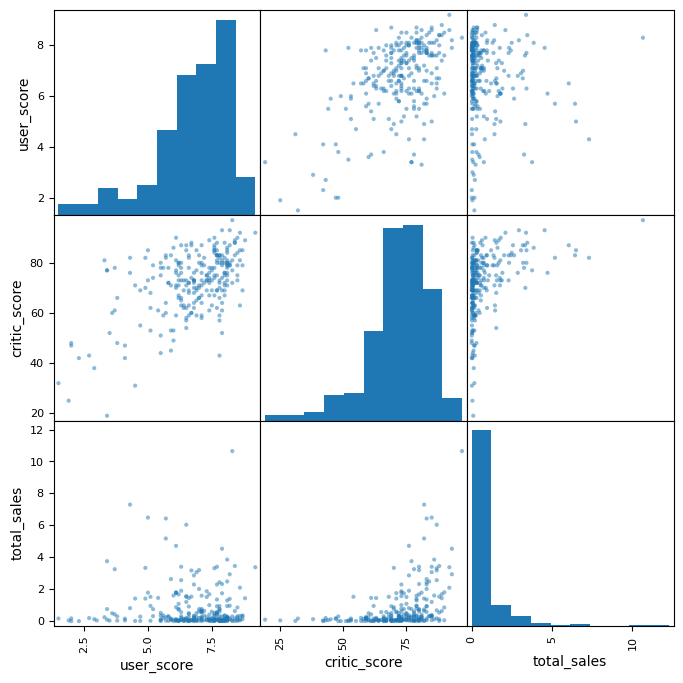

In [26]:
correlation_df=df[df['year_of_release']>=2012]
cols=['user_score','critic_score','total_sales']
fig=scatter_matrix(correlation_df[correlation_df['platform']=='PS4'][cols], figsize = (8,8))

In [27]:
correlation_df[correlation_df['platform']=='PS4'][cols].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031261
critic_score,0.557654,1.000000,0.405887
total_sales,-0.031261,0.405887,1.000000


**Análisis de correlación de la puntuación y las ventas de la plataforma PS3**

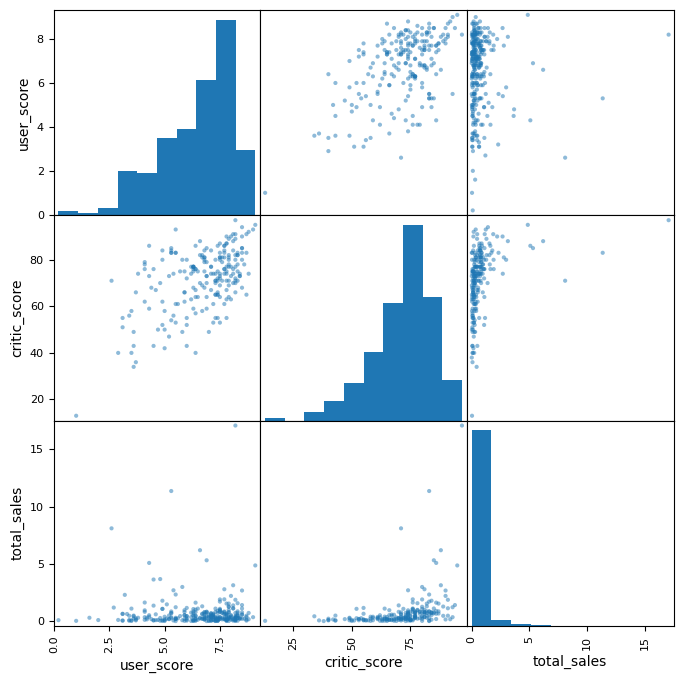

In [28]:
#Usamos la matriz de gráficos de dispersión para comparar las variables facilmente.
cols=['user_score','critic_score','total_sales']
fig=scatter_matrix(correlation_df[correlation_df['platform']=='PS3'][cols], figsize = (8,8))

In [29]:
#Calculo de la correlación
correlation_df[correlation_df['platform']=='PS3'][cols].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.539456,-0.005342
critic_score,0.539456,1.000000,0.334439
total_sales,-0.005342,0.334439,1.000000


Podemos evidenciar que la puntuación de los usuarios y los profesionales **no afecta** las ventas de los juegos en las plataformas **mas populares 'PS4' y 'PS3'**, debido a que sus gráficos de dispersión no indican **linealidad** y los **coeficientes de correlación son muy bajos**. únicamente podemos ver una mínima correlación entre la puntuación de los usuarios y la puntuación de los profesionales, sin embargo, esto no adiciona información relevante a nuestro análisis de plataformas.

**3.7. Ventas de los mismos juegos en diferentes plataformas.**

In [30]:
games=correlation_df[correlation_df['platform']=='PS4']['name'].values
games

array(['Call of Duty: Black Ops 3', 'Grand Theft Auto V', 'FIFA 16',
       'Star Wars Battlefront (2015)', 'Call of Duty: Advanced Warfare',
       'FIFA 17', 'Fallout 4', 'FIFA 15', 'Destiny',
       "Uncharted 4: A Thief's End", 'The Last of Us',
       'Uncharted: The Nathan Drake Collection',
       'Call of Duty: Infinite Warfare', 'Minecraft', 'Battlefield 1',
       'Watch Dogs', 'Far Cry 4', 'The Witcher 3: Wild Hunt',
       "Assassin's Creed: Unity", 'Batman: Arkham Knight', 'NBA 2K16',
       'Call of Duty: Ghosts', "Tom Clancy's The Division",
       'Battlefield 4', 'Metal Gear Solid V: The Phantom Pain',
       "Assassin's Creed Syndicate", 'Madden NFL 16', 'FIFA 14',
       'Middle-Earth: Shadow of Mordor',
       "Assassin's Creed IV: Black Flag", 'inFAMOUS: Second Son',
       'Mortal Kombat X', 'Killzone: Shadow Fall', 'Bloodborne',
       'NBA 2K15', 'Need for Speed (2015)', 'Far Cry: Primal',
       "Tom Clancy's Rainbow Six: Siege", 'Madden NFL 15', 'Overwatch',
 

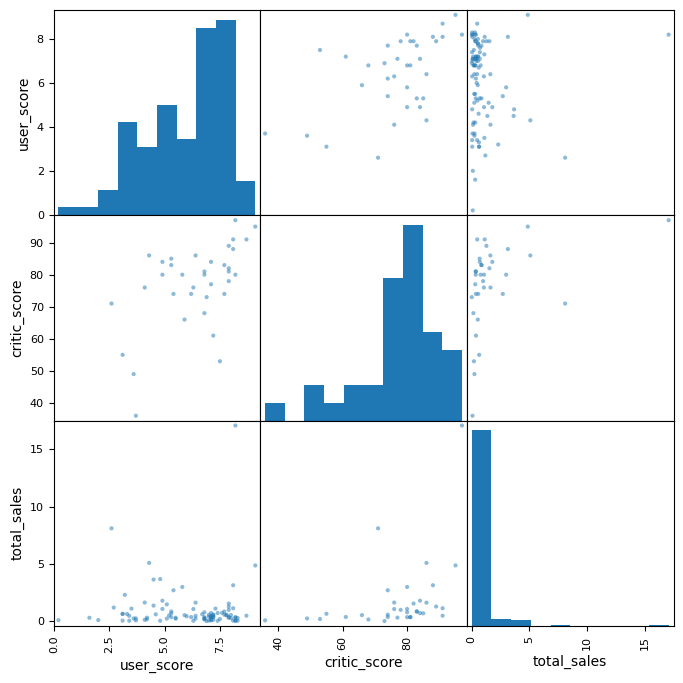

In [31]:
cols=['user_score','critic_score','total_sales']
fig=scatter_matrix(correlation_df[(correlation_df['platform']=='PS3')&(correlation_df['name'].isin(games))][cols], figsize = (8,8))

In [32]:
correlation_df[(correlation_df['platform']=='PS3')&(correlation_df['name'].isin(games))][cols].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.532986,0.007364
critic_score,0.532986,1.000000,0.372413
total_sales,0.007364,0.372413,1.000000


Aqui hicimos el mismo análisis, pero solo teniendo en cuenta los mismos juegos en común entre la consola 'PS4' y la consola 'PS3', sin embargo, tenemos resultados con menos correlación.

In [33]:
popular_list=['PS4','PS3','XOne','X360']
same_games=correlation_df[(correlation_df['platform'].isin(popular_list))&(correlation_df['name'].isin(games))]
same_games_group=same_games.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
fig=px.bar(same_games_group,x='platform',y='total_sales',title='Ventas por plataforma',color='platform')
fig.show()


In [34]:
games_PS3=correlation_df[correlation_df['platform']=='PS3']['name'].values
same_games=correlation_df[(correlation_df['platform'].isin(popular_list))&(correlation_df['name'].isin(games_PS3))]
same_games_group=same_games.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
fig=px.bar(same_games_group,x='platform',y='total_sales',title='Ventas por plataforma',color='platform')
fig.show()

In [35]:
games_ps4=correlation_df[correlation_df['platform']=='PS4']
games_ps3=correlation_df[correlation_df['platform']=='PS3']
games_common=games_ps4.merge(games_ps3,on='name',how='inner')
games_common_list=games_common['name'].values

In [36]:
same_games=correlation_df[(correlation_df['platform'].isin(popular_list))&(correlation_df['name'].isin(games_common_list))]
same_games_group=same_games.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
fig=px.bar(same_games_group,x='platform',y='total_sales',title='Ventas por plataforma',color='platform')
fig.show()

Si revisamos las ventas de los mismos juegos en comun entre las ventas según los juegos de las plataformas, podemos encontrar que si usamos **los juegos de la PS4** tenemos lógicamente a esta consola como la más rentable, seguida de la XOne, debido a que es contemporanea y por 'ultimo PS3 y X360. Por otro lado usando **los juegos de la PS3** tenemos el caso contrario al caso anterior, la PS3 punteando en ventas, seguido de X360 que es contemporanea seguida de PS4 y XOne. Al tener sesgos al usar juegos de una plataforma u otra, se hizo un **análisis final**, teniendo en cuenta unicamente **los juegos en común entre la PS4 y la PS3**, dandonos como resultado que **la PS4, tiene más ventas si tomamos los datos desde el 2012**, seguido de la PS3, la X360 y la XOne respectivamente. Podemos sacar de este análisis que hasta el momento **la plataforma más rentable es la PS4**. 

**3.8. Análisis de los géneros**

In [37]:
genre_df=correlation_df.groupby('genre')['total_sales'].sum().reset_index()
genre_df.sort_values(by='total_sales',inplace=True,ascending=False)
fig_genre=px.bar(genre_df,x='genre',y='total_sales',color='genre',title='Ventas totales por genero de videojuego')
fig_genre.show()

In [38]:
genre_top5=genre_df['genre'].head(5)
genre_top5_list=genre_top5.values
genre_time=correlation_df[correlation_df['genre'].isin(genre_top5_list)].groupby(['year_of_release','genre'])['total_sales'].sum().reset_index()
fig_genre=px.line(genre_time,x='year_of_release',y='total_sales',color='genre')
fig_genre.show()

Podemos análizar que los 5 generos más vendidos son **'Action','Shooter','Role-Playing','Sports' y 'Misc'**, ordenados de más a menos ventas. Además podemos ver que que el género de Action para 2016 decreció más que el genero Shooting, por lo que este podria sustituír al genero Action, mismo caso con el genero Sports y Role-Playing, el genero Sports decreció más que el genero Role-Playing.
Podemos decir que estos son los generos que más rentabilidad tienen actualmente, además podemos decir que el genero Shooting va a ser más vendido que el genero Action que es el más vendido.

**4. Crea un perfil de usuario para cada región**

**4.1. Plataformas por usuario**

In [39]:
#Creamos las un dataframe con las plataformas por región 
profile_platform=correlation_df.groupby('platform').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','total_sales':'sum'}).reset_index()
profile_platform.sort_values(by='total_sales',ascending=False,inplace=True)
profile_platform_top5=profile_platform.head(5)
profile_platform_top5

,platform,na_sales,eu_sales,jp_sales,total_sales
4,PS4,108.74,141.09,15.96,265.79
3,PS3,103.38,106.86,35.29,245.53
9,X360,140.05,74.52,1.57,216.14
0,3DS,55.31,42.64,87.79,185.74
10,XOne,93.12,51.59,0.34,145.05


In [40]:
#Pasamos el dataframe de columnas a filas para que podamos graficar la información
#Este dataframe se usó para crear la tabla de ventas por región.
profile_melted_total=pd.melt(profile_platform,id_vars=['platform'],value_vars=['na_sales','eu_sales','jp_sales'],var_name='market', value_name='sales')

In [41]:
#Pasamos el dataframe de columnas a filas para que podamos graficar la información
profile_melted=pd.melt(profile_platform_top5,id_vars=['platform'],value_vars=['na_sales','eu_sales','jp_sales'],var_name='market', value_name='sales')

In [42]:
profile_melted

,platform,market,sales
0,PS4,na_sales,108.74
1,PS3,na_sales,103.38
2,X360,na_sales,140.05
3,3DS,na_sales,55.31
4,XOne,na_sales,93.12
5,PS4,eu_sales,141.09
6,PS3,eu_sales,106.86
7,X360,eu_sales,74.52
8,3DS,eu_sales,42.64
9,XOne,eu_sales,51.59


In [43]:
#Ventas por región y porcentaje de participación en las ventas
total_sales_per_region=profile_melted_total.groupby('market')['sales'].sum().reset_index()
total_sales_per_region['percentage']=(100*total_sales_per_region['sales']/total_sales_per_region['sales'].sum()).round(2)
total_sales_per_region.sort_values(by='sales',ascending=False)

,market,sales,percentage
2,na_sales,590.97,45.80
0,eu_sales,506.82,39.28
1,jp_sales,192.58,14.92


In [44]:
fig_profiles=px.histogram(profile_melted,x='market',y='sales',color='platform',barmode='group',title='Ventas por plataforma en cada región')
fig_profiles.show()

Podemos ver que en el mercado, Europa y Norte America tiene muchas más ventas que Japón, Japón equivale solo al 15.92% de las ventas totales, sin embargo, de este gráfico podemos concluír que las plataformas principales dependen de la región, en cada región destaca una plataforma diferente, por ejemplo en **Norte America destaca la X360, seguido de PS4, PS3, XOne y 3DS** y por el lado de **europa destaca la PS4 sobre todas, seguido de PS3, X360, XOne y 3DS**. El caso de Japón es muy particular, debido a que **la 3DS es la más utilizada, seguida de la PS3, PS4, X360 y XOne**.
Teniendo en cuenta esto podemos decir que no se puede generalizar cual será la consola más exitosa de las tres regiones, ya que varía mucho, solo podemos decir que las plataformas más rentables teniendo en cuenta las 3 regiones son **PS3 y PS4.**

**4.2. Genero por usuario**

In [45]:
profile_genre=correlation_df.groupby('genre').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','total_sales':'sum'}).reset_index()
profile_genre.sort_values(by='total_sales',ascending=False,inplace=True)
profile_genre_top5=profile_genre.head(5)
profile_genre_top5

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,177.84,159.34,52.80,389.98
8,Shooter,144.77,113.47,9.23,267.47
7,Role-Playing,64.00,48.53,65.44,177.97
10,Sports,81.53,69.09,8.01,158.63
3,Misc,38.19,26.32,12.86,77.37


In [46]:
#Pasamos el dataframe de columnas a filas para que podamos graficar la información
profile_melted2=pd.melt(profile_genre_top5,id_vars=['genre'],value_vars=['na_sales','eu_sales','jp_sales'],var_name='market', value_name='sales')

In [47]:
profile_melted2

,genre,market,sales
0,Action,na_sales,177.84
1,Shooter,na_sales,144.77
2,Role-Playing,na_sales,64.00
3,Sports,na_sales,81.53
4,Misc,na_sales,38.19
5,Action,eu_sales,159.34
6,Shooter,eu_sales,113.47
7,Role-Playing,eu_sales,48.53
8,Sports,eu_sales,69.09
9,Misc,eu_sales,26.32


In [48]:
fig_profiles=px.histogram(profile_melted2,x='market',y='sales',color='genre',barmode='group',title='Ventas por genero de cada región')
fig_profiles.show()

En cuanto a los generos, tenemos comportamientos parecidos entre Norte America y Europa, donde los 5 generos más populares son: **Action, Shooter, Sports, Role-Playing y Misc.** Por otro lado En el lado de Japón, los generos más populares son **Role-playing, Action, Misc, Shooter y Sports**. No es posible generaralizar los generos, teniendo en cuenta que Japón tiene unos gustos totalmente diferentes, sin embargo, podemos decir que el genero **Action** es el más rentable en los 3 paises.

**4.3. Perfil por clasificación ESRB**

In [49]:
profile_rating=correlation_df.groupby('rating').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','total_sales':'sum'}).reset_index()
profile_rating.sort_values(by='total_sales',ascending=False,inplace=True)
profile_rating

,rating,na_sales,eu_sales,jp_sales,total_sales
2,M,231.57,193.96,21.20,446.73
0,E,114.37,113.03,28.33,255.73
3,T,66.02,52.96,26.02,145.00
1,E10+,75.70,55.37,8.19,139.26


In [50]:
#Pasamos el dataframe de columnas a filas para que podamos graficar la información
profile_melted3=pd.melt(profile_rating,id_vars=['rating'],value_vars=['na_sales','eu_sales','jp_sales'],var_name='market', value_name='sales')

In [51]:
profile_melted3

,rating,market,sales
0,M,na_sales,231.57
1,E,na_sales,114.37
2,T,na_sales,66.02
3,E10+,na_sales,75.70
4,M,eu_sales,193.96
5,E,eu_sales,113.03
6,T,eu_sales,52.96
7,E10+,eu_sales,55.37
8,M,jp_sales,21.20
9,E,jp_sales,28.33


In [52]:
fig_profiles=px.histogram(profile_melted3,x='market',y='sales',color='rating',barmode='group',title='Ventas por clasificación de cada región')
fig_profiles.show()

Respecto a las calificaciones de los juegos, podemos ver un comportamiento similar para Norte America y Europa, donde predomina la clasificación **M, seguido por la E, E10+ y T**. Caso contrario para Japón, en donde predomina la clase **E seguido de T, M y E10+**, este comportamiento se pudede deber a que los japoneses prefieren el contenido para todo el publico a el maduro que es para **mayores de 17**. Podemos decir que la clase **E** es la más popular para las 3 regiones al ser un contenido para todo publico. 

**5.Pruebas de Hipotesis** 

**5.1 Prueba que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.  
H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son iguales.  
Indice de significancia del 5%

Teniendo en cuenta que queremos comparar las categorías **XOne** y **PC** con respecto a la calificación del usuario si es igual o no y donde desconocemos las desviaciones estandar de la población, la prueba que más se ajusta es una **Ttest de una cola**, para determinar si se rechaza la hipotesis nula o no.

In [53]:
df_xone=df[df['platform']=='XOne']['user_score'].dropna()
df_pc=df[df['platform']=='PC']['user_score'].dropna()
var_xone=np.var(df_xone)
var_pc=np.var(df_pc)
print(f'Varianza de la Xbox ONE: {var_xone}\nVarianza de la PC: {var_pc}')

Varianza de la Xbox ONE: 1.8965188383045526
Varianza de la PC: 2.3377471580367684


In [54]:
alpha=0.05
results=st.ttest_ind(df_xone,df_pc)
print(f'La calificación promedio de los usuarios para Xbox One es : {df_xone.mean()}\nLa calificación promedio de los usuarios para PC es : {df_pc.mean()}\n\nt-statistic: {results[0]}\np-value: {results[1]}')
if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

La calificación promedio de los usuarios para Xbox One es : 6.521428571428572
La calificación promedio de los usuarios para PC es : 7.062467532467533

t-statistic: -4.368333815003015
p-value: 1.3896435533548819e-05
Rechazamos la hipótesis nula


Al ser nuestro p valor menor a la significancia del 5%, se rechaza la hipotesis nula y se concluye que **no tenemos información suficiente para determinar que las calificaciones de Xbox One y PC son iguales**.

**5.2. Prueba que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.  
H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son iguales.  
Indice de significancia del 5%

Teniendo en cuenta que queremos comparar los géneros **Action** y **Sports** con respecto a la calificación del usuario si es igual o no y donde desconocemos las desviaciones estandar de la población, la prueba que más se ajusta es una **Ttest de una cola**, para determinar si se rechaza la hipotesis nula o no.

In [55]:
df_action=df[df['genre']=='Action']['user_score'].dropna()
df_sports=df[df['genre']=='Sports']['user_score'].dropna()
var_action=np.var(df_action)
var_sports=np.var(df_sports)
print(f'Varianza del género Acción: {var_action}\nVarianza del género Sports: {var_sports}')

Varianza del género Acción: 2.03063665382663
Varianza del género Sports: 2.594160671177017


In [56]:
alpha=0.05
results1=st.ttest_ind(df_action,df_sports)
print(f'La calificación promedio de los usuarios para Xbox One es : {df_sports.mean()}\nLa calificación promedio de los usuarios para PC es : {df_action.mean()}\n\nt-statistic: {results1[0]}\np-value: {results1[1]}')
if results1.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

La calificación promedio de los usuarios para Xbox One es : 6.961196736174069
La calificación promedio de los usuarios para PC es : 7.054043715846995

t-statistic: 1.6259419280500857
p-value: 0.10406951359049141
No podemos rechazar la hipótesis nula


Al ser nuestro p valor menor a la significancia del 5%, no se rechaza la hipotesis nula y se concluye que **podemos determinar que las calificaciones del género Action y Sports son iguales**.

**6. Conclusión general.**  

En conclusión del proyecto integrado, podemos decir que:

1. Los datos necesarios para hacer el pronostico de cual va a ser la plataforma más popular para el 2017, van desde el **2011**, debido a que es el momento en el cual las plataformas más populares comienzan a crecer, y posteriormente nacen las plataformas más nuevas.

2.  Se descartan los datos anteriores a **1995**, debido a que son datos en los cuales los juegos no eran tan populares según los gráficos, donde vemos nuestro primer punto de inflexión a partír de ese año.

3. Se determina que el periodo de vida de una plataforma es de **5 años creciendo y 5 decreciendo.**

4.  Las plataformas con más ventas no son necesariamente las más populares, debido a que vemos plataformas nuevas con menor cantidad de ventas globales, pero para los últimos años repuntan más que las plataformas globales, este es el caso de **'PS3' y 'PS4'** donde la plataforma 'PS3' tiene más ventas globales que 'PS4', sin embargo, en los últimos años el **'PS4' comienza a obtener más fuerza con mayor ventas totales**.

5.  Las calificaciones de los usuarios y profesionales no incluye en las ventas totales de las plataformas, debido a que no se encuentra linealidad ni correlación significativa para afirmar esto.

6.  Al analizar las plataformas populares con juegos en común, la plataforma que obtiene más ventas es la 'PS4'.

7. Los generos más popupares de los últimos años son: **'Action','Shooter','Role-Playing','Sports' y 'Misc'** .

8. No se puede generalizar la popularidad en las 3 regiones, debido a que varía mucho el género y la clasificación de **Europa y Norte America** contra **Japón**  
- Al abrir los perfiles de cada región, vemos un panorama distinto en cuanto a las plataformas, concluyendo que los norteamericanos consumen más la plataforma **Xbox 360**, contrario a los europeos que consumen más la **'PS4'** y los japoneses que utilizan la **'3DS'** la cual no es muy popular en las otras dos regiones.  
-  Los generos populares en Europa y Norte America son los mismos en mismo orden de popularidad, sin embargo, en Japón es totalmente diferente.  
-  La clasificación que Europa y Norte America consumen es igual, destacando la clasificación **M** para mayores de **17 años**. Por el contrario Japón es más conservador y se queda con la  categoría **E** para todo el publico.
9. Se probaron las hipotesis nulas concluyendo que no tenemos la información suficiente para determinar que **la calificación de Xbox One y PC son iguales** y que se determina que las calificaciones de **Action y Sports son iguales**.     